### 1. Google Play Store apps and reviews
We have two data files:
- ```apps.csv```: contains information about the apps in the Google Play Store. There are 13 features that describe a given app
- ```user_reviews.csv```: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new featuers: Sentiment (Positive, Negative, or Neutral), Sentiment Polarity, and Sentiment Subjectivity.

In [7]:
# read in datasets
import pandas as pd
apps_with_duplicates = pd.read_csv('apps.csv')

# drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# look at a random sample of 5 rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2792,3538,Keep My Notes - Notepad & Memo,PRODUCTIVITY,4.6,122424,4.7,"5,000,000+",Free,0,Everyone,Productivity,"March 16, 2018",1.35.2,2.3.3 and up
1697,2165,RISK: Global Domination,FAMILY,4.0,68559,75.0,"5,000,000+",Free,0,Everyone,Board;Action & Adventure,"July 31, 2018",1.19.56.434,4.4 and up
6872,7932,Navigator PRO - GPS Navigation with Offline Maps,TRAVEL_AND_LOCAL,3.6,892,70.0,"50,000+",Paid,$2.49,Everyone,Travel & Local,"August 1, 2018",1.08,4.0 and up
6377,7424,CJ WOW SHOP,SHOPPING,4.2,2099,4.0,"100,000+",Free,0,Everyone,Shopping,"December 23, 2017",1.1.1,4.0.3 and up
3609,4514,Q-Ticketing,MAPS_AND_NAVIGATION,3.8,114,19.0,"10,000+",Free,0,Everyone,Maps & Navigation,"December 18, 2017",1.8.3111,4.3 and up


### 2. Data cleaning
We see that some entries in columns like ```Installs``` and ```Price``` have a few special characters that we need to remove. We also see that some of the apps have missing values in columns like ```Size``` and ```Installs```.

In [8]:
# list of characters to remove
chars_to_remove = ['+', ',', '$']

# list of column names to clean
cols_to_clean = ['Installs', 'Price']

# loop for each column in cols_to_clean
for col in cols_to_clean:
    # loop for each char in chars_to_remove
    for char in chars_to_remove:
        # replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

# print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


### 3. Correcting data types
The columns `Installs` and `Price` are of type ```object```. We need to convert them to ```int``` or ```float```.

In [9]:
import numpy as np

# convert installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

# convert price to float data type
apps['Price'] = apps['Price'].astype(float)

# checking dtypes of the apps dataframe
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


### 4. Exploring app categories
We need to answer the following questions:
- Which category has the highest share of (active) apps in the market?
- Is any specific category dominating the market?
- Which categories have the fewest number of apps?

In [10]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# count the number of apps in each 'Category'
num_apps_in_category = apps['Category'].value_counts()

# sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

data = [go.Bar(
    x = num_apps_in_category.index, # index = category name
    y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


### 5. Distribution of app ratings
Let's see how these apps perform on average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps, as well as the company's overall brand image. 

In [12]:
# average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# distribution of apps according to their ratings
data = [go.Histogram(
    x = apps['Rating']
)]

# vertical dashed line to indicate the average app rating
layout = {'shapes': [{
    'type': 'line',
    'x0': avg_app_rating,
    'y0': 0,
    'x1': avg_app_rating,
    'y1': 1000,
    'line': {'dash': 'dashdot'}
}]
}

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


### 6. Size and price of an app
How can we effectively come up with strategies to size and price our app?
- Does the size of an app effect its rating?
- Do users really care about system-heavy apps or do they prefer light-weighted apps?
- Does the price of an app affect its rating?
- Do users always prefer free apps over paid apps?

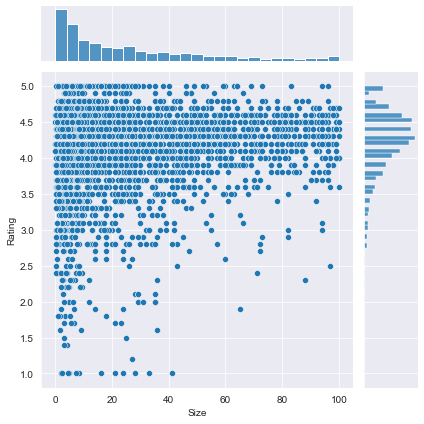

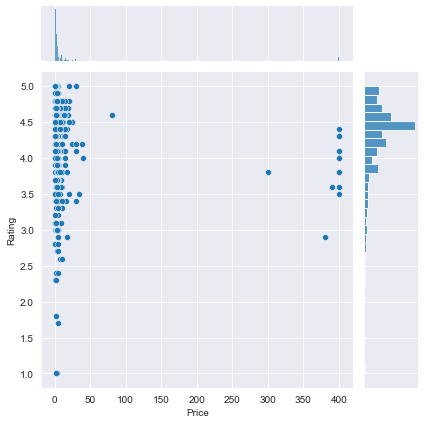

In [17]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

# plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

### 7. Relation between app category and app price
Different categories demand different price ranges. Apps that are simple and used daily, like a calculator, are better off kept free. It would make sense to charge for a highly-specialized mdical app that diagnoses diabetic patients.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


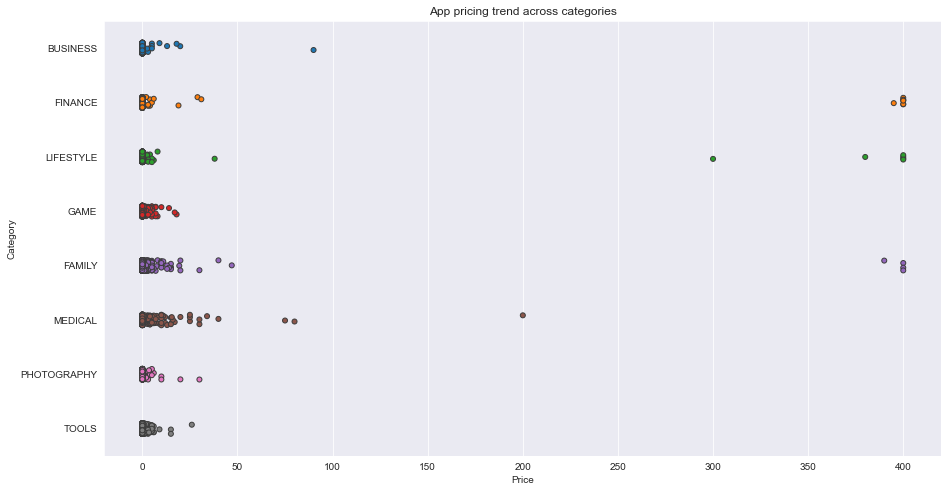

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

### 8. Filter out 'junk' apps
Filter out the 'junk' apps and re-do the visualization.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

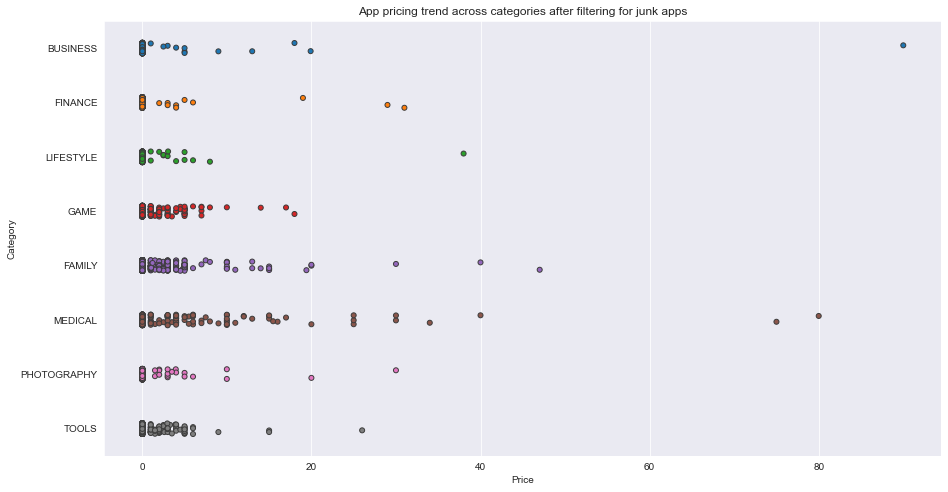

In [19]:
# select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

### 9. Popularity of paid apps vs free apps
Free apps characteristics:
- free to download
- main source of income comes from ads
- often created by companies that have other products and the app serves as an extension of those products
- can serve as a tool for customer retention, communication, and customer service

Paid apps characteristics:
- users are aksed to pay once for the app to download and use it
- the user can't get a feel for the app before purchasing

In [20]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

### 10. Sentiment analysis of user reviews
Let's mine the data for user reviews

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

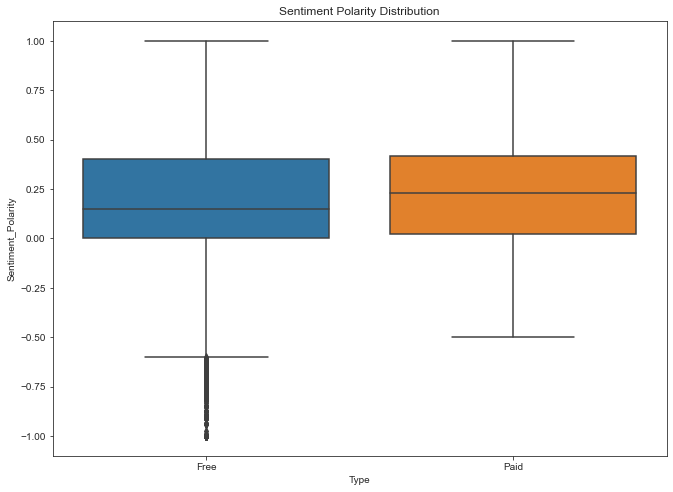

In [22]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on = "App")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')